In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar
import missingno as msno

In [20]:
# Создаем папку для сохранения графиков
output_folder = "charts/task3"
os.makedirs(output_folder, exist_ok=True)

In [21]:
# Загружаем датасеты
print("💾 Загружаем датасеты...")
OUTLETS = pd.read_csv('outlets.csv', delimiter=';', dtype=str, low_memory=False)
SELLOUT = pd.read_csv('SELLOUT_TIME.csv', delimiter=';', dtype=str, low_memory=False)

💾 Загружаем датасеты...


In [22]:
SELLOUT.head(10)

,product_id,outlet_id,org_name,cnt,sell_date
0,5000157992514,00000000298713,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1,2022-01-26
1,5000157992514,00000000298715,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1,2022-01-08
2,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",2,2022-01-20
3,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-01-27
4,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-01-28
5,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-01-31
6,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-02-03
7,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-02-07
8,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-02-17
9,5000157992514,00000000298716,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1,2022-03-09


In [23]:
SELLOUT = SELLOUT.drop('outlet_id', axis = 1)

In [24]:
SELLOUT = SELLOUT.drop('sell_date', axis = 1)

In [25]:
SELLOUT.head(10)

,product_id,org_name,cnt
0,5000157992514,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1
1,5000157992514,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТАНДЕР""",1
2,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",2
3,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
4,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
5,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
6,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
7,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
8,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1
9,5000157992514,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛАНК...",1


In [32]:
# Группируем данные по поставщику и суммируем количество
supplier_summary = SELLOUT.groupby("org_name")["cnt"].sum().reset_index()

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(supplier_summary["org_name"], supplier_summary["cnt"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Количество закупленного товара")
plt.title("Закупки по поставщикам")
plt.show()

            Missing Values    %
product_id               0  0.0
outlet_id                0  0.0
org_name                 0  0.0
cnt                      0  0.0
sell_date                0  0.0


C:\Users\pisma\AppData\Local\Temp\ipykernel_10808\815873217.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")


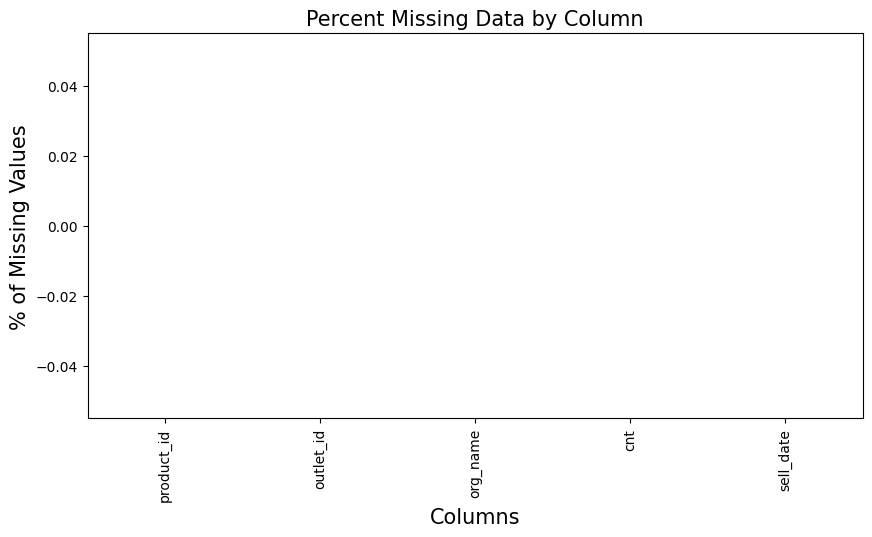

In [30]:
# Функция для подсчета количества пропусков в каждом столбце
def count_missing(df):
    total = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Values', '%'])
    return(missing_data)

# Выводим количество пропусков
missing_values = count_missing(SELLOUT)
print(missing_values)

# Строим график пропусков
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")
plt.xlabel('Columns', fontsize=15)
plt.ylabel('% of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Column', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [57]:
OUTLETS.drop(columns='federal_subject', inplace=True, axis=1)

In [58]:
# Приведение типов
print("🔄 Приведение данных к нужным типам...")
SELLOUT['sell_date'] = pd.to_datetime(SELLOUT['sell_date'], format='%Y-%m-%d', errors='coerce')
SELLOUT['cnt'] = pd.to_numeric(SELLOUT['cnt'], errors='coerce').fillna(0).astype(int)
SELLOUT['outlet_id'] = SELLOUT['outlet_id'].astype(str)
OUTLETS['outlet_id'] = OUTLETS['outlet_id'].astype(str)

# Объединение данных
SELLOUT = SELLOUT.merge(OUTLETS, on='outlet_id', how='outer')


🔄 Приведение данных к нужным типам...


In [55]:
SELLOUT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40412112 entries, 0 to 40412111
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   product_id        object        
 1   outlet_id         object        
 2   org_name          object        
 3   cnt               int64         
 4   sell_date         datetime64[ns]
 5   org_name_outlets  object        
 6   address           object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.1+ GB


                  Missing Values         %
product_id                 38534  0.088810
outlet_id                      0  0.000000
org_name                   38534  0.088810
cnt                        38534  0.088810
sell_date                  38534  0.088810
org_name_outlets         2938580  6.772603
address                  2938580  6.772603


C:\Users\pisma\AppData\Local\Temp\ipykernel_10808\815873217.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")


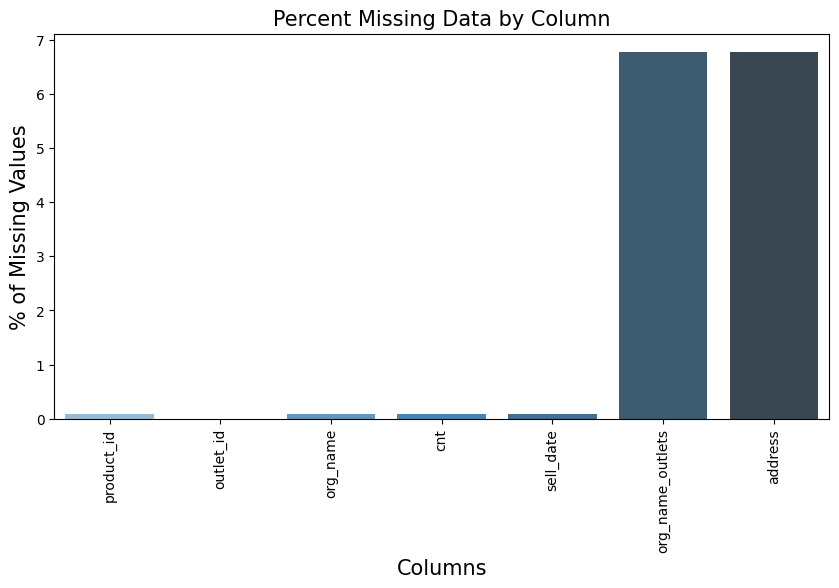

: 

In [ ]:
# Функция для подсчета количества пропусков в каждом столбце
def count_missing(df):
    total = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Values', '%'])
    return(missing_data)

# Выводим количество пропусков
missing_values = count_missing(SELLOUT)
print(missing_values)

# Строим график пропусков
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")
plt.xlabel('Columns', fontsize=15)
plt.ylabel('% of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Column', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [35]:
df = pd.read_csv("outlets.csv", sep= ";")

In [36]:
df

,outlet_id,org_name_outlets,federal_subject,address
0,500601,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГАЛА...",Белгородская область,"Белгородская область, Прохоровский р-н, пгт Пр..."
1,500604,"Общество с ограниченной ответственностью ""Фарм...",Ивановская область,"Ивановская область, Тейковский р-н, г Тейково,..."
2,500608,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭКОН...",Ставропольский край,"Ставропольский край, г Кисловодск, ул 40 лет О..."
3,500611,"Общество с ограниченной ответственностью ""СТАМУС""",Краснодарский край,"Краснодарский край, г Краснодар, тер. Пашковск..."
4,500612,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЛИГА""",Москва город,"Город Москва, ш Открытое, д. 5 к. 11, помещ. 6/1"
...,...,...,...,...
124066,288549,ИП Осадчая Н.Г.,Алтайский край,"Алтайский край, г Барнаул, ул Попова, д. 4 к. 1"
124067,288550,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМЕГА""",Оренбургская область,"Оренбургская область, г Оренбург, ул Розы Люкс..."
124068,288551,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМЕГА""",Оренбургская область,"Оренбургская область, г Оренбург, ул Центральн..."
124069,288552,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ОМЕГА""",Оренбургская область,"Оренбургская область, г Оренбург, пр-кт Братье..."


                  Missing Values         %
outlet_id                      0  0.000000
org_name_outlets               0  0.000000
federal_subject              284  0.228901
address                        0  0.000000


C:\Users\pisma\AppData\Local\Temp\ipykernel_10808\4000705379.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")


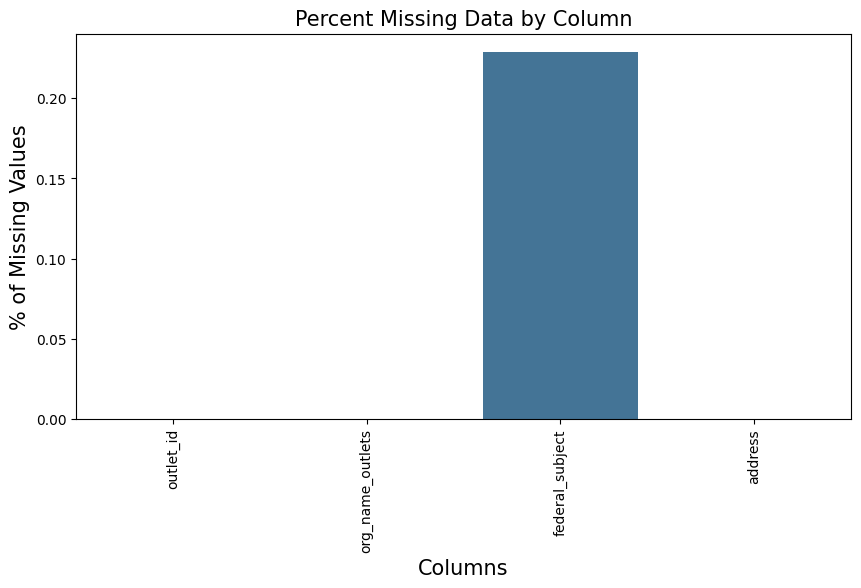

In [37]:
# Функция для подсчета количества пропусков в каждом столбце
def count_missing(df):
    total = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Values', '%'])
    return(missing_data)

# Выводим количество пропусков
missing_values = count_missing(df)
print(missing_values)

# Строим график пропусков
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")
plt.xlabel('Columns', fontsize=15)
plt.ylabel('% of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Column', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [38]:
df1 = pd.read_csv('SELLOUT_TIME.csv', sep = ';', low_memory=False)

            Missing Values    %
product_id               0  0.0
outlet_id                0  0.0
org_name                 0  0.0
cnt                      0  0.0
sell_date                0  0.0


C:\Users\pisma\AppData\Local\Temp\ipykernel_10808\2465630125.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")


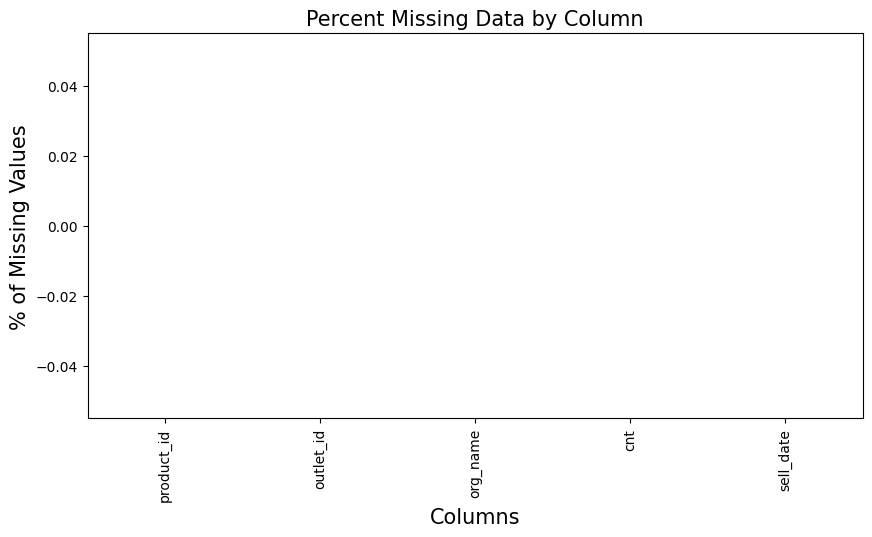

In [39]:
# Функция для подсчета количества пропусков в каждом столбце
def count_missing(df):
    total = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Values', '%'])
    return(missing_data)

# Выводим количество пропусков
missing_values = count_missing(df1)
print(missing_values)

# Строим график пропусков
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values['%'], palette="Blues_d")
plt.xlabel('Columns', fontsize=15)
plt.ylabel('% of Missing Values', fontsize=15)
plt.title('Percent Missing Data by Column', fontsize=15)
plt.xticks(rotation=90)
plt.show()